# Overview

## Load packages and data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import pandas as pd
import matplotlib.pyplot as plt
# warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

%matplotlib inline

In [15]:
talking = pd.read_csv('./data/train20m_sample.csv', parse_dates = ['click_time'])

In [16]:
len(talking)

20000000

In [17]:
talking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 8 columns):
ip                 int64
app                int64
device             int64
os                 int64
channel            int64
click_time         datetime64[ns]
attributed_time    object
is_attributed      int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.2+ GB


In [18]:
num_attributed_time = talking['is_attributed'].value_counts()
num_attributed_time

0    19950612
1       49388
Name: is_attributed, dtype: int64

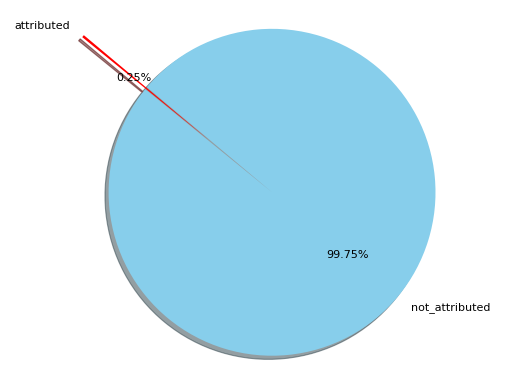

In [60]:
# visualize the imbalance: extremely imbalanced
labels = 'attributed', 'not_attributed'
sizes = [num_attributed_time[1], num_attributed_time[0]]
colors = ['red', 'skyblue']
explode = (0.5, 0)  # explode 1st slice
 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
 
plt.axis('equal')
# plt.figure(figsize=(20,10))
plt.show()

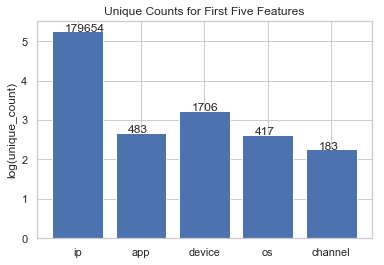

In [116]:
heads = talking.columns
# print(heads)
# for i in list(range(0,5)) + list(range(-1, -6, -1)):
#     talking[heads[i]] = talking[heads[i]].astype('category')
# talking.info()
# visualize number of unique values for each categorical feature
x = np.arange(1, 6)
unique = [len(talking[i].unique()) for i in heads[:5]]
y = np.array([math.log(i, 10) for i in unique])

plt.bar(x, y)
for i, v in enumerate(unique):
    plt.text(i + .8, math.log(v, 10), str(v))

plt.ylabel('log(unique_count)')
plt.xticks(np.arange(1,6), ('ip', 'app', 'device', 'os', 'channel'))
plt.title('Unique Counts for First Five Features')
plt.show()

# import seaborn as sns
# sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.barplot(x=x, y=y, color=None)

In [75]:
train = talking
temp = train['ip'].value_counts().reset_index(name='counts')
temp.columns = ['ip', 'counts']
temp[:10]

,ip,counts
0,5348,133488
1,5314,126917
2,73516,83434
3,73487,82652
4,53454,53704
5,114276,46617
6,26995,43540
7,95766,41053
8,17149,33818
9,105475,32833


In [76]:
train= train.merge(temp, on='ip', how='left')
train[train['is_attributed']==1].sort_values('counts', ascending=False)[:10]
train['is_attributed']=train['is_attributed'].astype(int)

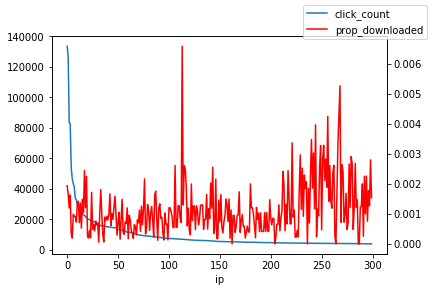

In [96]:
proportion = train[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# ax = merge[['click_count','prop_downloaded']][:300].reset_index().plot(secondary_y='prop_downloaded')
# plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
# ax.set(ylabel='Count of clicks')
# plt.ylabel('Proportion Downloaded')
# plt.show()

# print('Counversion Rates over Counts of Most Popular IPs')
# print(merge[:20])

# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
# plt.xlabel('ip')
ax = merge[:300].reset_index().plot(x="index", y="click_count", legend=False)
ax2 = ax.twinx()
merge[:300].reset_index().plot(x="index", y="prop_downloaded", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='ip')
plt.show()


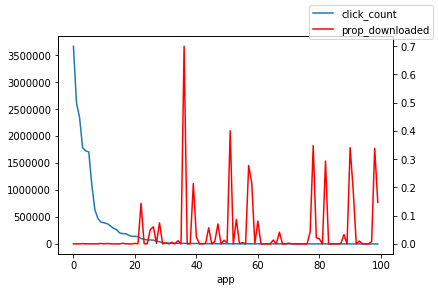

In [97]:
proportion = train[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

# ax = merge[:100].plot(secondary_y='prop_downloaded')
# plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
# ax.set(ylabel='Count of clicks')
# plt.ylabel('Proportion Downloaded')
# plt.show()

# print('Counversion Rates over Counts of Most Popular Apps')
# # print(merge[:20])

ax = merge[:100].reset_index().plot(x="index", y="click_count", legend=False)
ax2 = ax.twinx()
merge[:100].reset_index().plot(x="index", y="prop_downloaded", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='app')
plt.show()

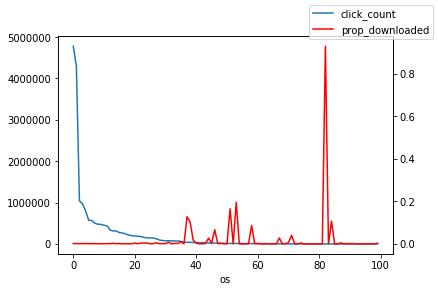

In [98]:
proportion = train[['os', 'is_attributed']].groupby('os', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['os', 'is_attributed']].groupby('os', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='os', how='left')
merge.columns = ['os', 'click_count', 'prop_downloaded']

# ax = merge[:100].plot(secondary_y='prop_downloaded')
# plt.title('Conversion Rates over Counts of 100 Most Popular Operating Systems')
# ax.set(ylabel='Count of clicks')
# plt.ylabel('Proportion Downloaded')
# plt.show()

# print('Counversion Rates over Counts of Most Popular Operating Systems')
# # print(merge[:20])
ax = merge[:100].reset_index().plot(x="index", y="click_count", legend=False)
ax2 = ax.twinx()
merge[:100].reset_index().plot(x="index", y="prop_downloaded", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='os')
plt.show()

Count of clicks and proportion of downloads by device:


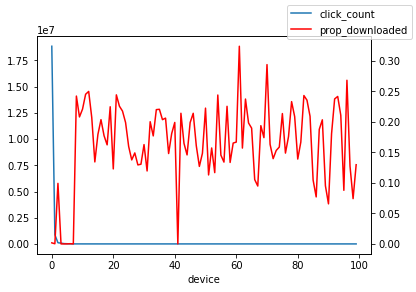

In [99]:
proportion = train[['device', 'is_attributed']].groupby('device', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['device', 'is_attributed']].groupby('device', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='device', how='left')
merge.columns = ['device', 'click_count', 'prop_downloaded']
print('Count of clicks and proportion of downloads by device:')
# print(merge)
ax = merge[:100].reset_index().plot(x="index", y="click_count", legend=False)
ax2 = ax.twinx()
merge[:100].reset_index().plot(x="index", y="prop_downloaded", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='device')
plt.show()

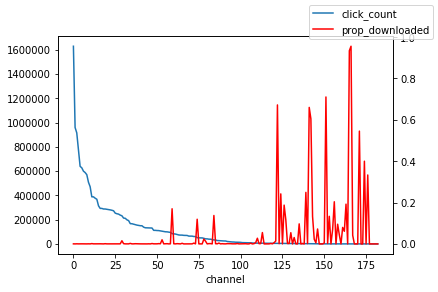

In [100]:
proportion = train[['channel', 'is_attributed']].groupby('channel', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = train[['channel', 'is_attributed']].groupby('channel', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='channel', how='left')
merge.columns = ['channel', 'click_count', 'prop_downloaded']
# print(merge[:100])

# fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('channel')
# ax1.set_ylabel('click_count', color=color)
# ax1.plot(list(merge[:100]['channel']), list(merge[:100]['click_count']), color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('prop_downloaded', color=color)  # we already handled the x-label with ax1
# ax1.plot(list(merge[:100]['channel']), list(merge[:100]['prop_downloaded']), color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.show()


# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(merge[:100]['channel'], merge[:100]['click_count'], color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


# ax = merge[['click_count','prop_downloaded']][:100].reset_index().plot(x='index',secondary_y='prop_downloaded')
# # ax = merge[:100].plot()
# plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
# ax.set(ylabel='Count of clicks')
# plt.ylabel('Proportion Downloaded')
# plt.show()

ax = merge.reset_index().plot(x="index", y="click_count", legend=False)
ax2 = ax.twinx()
merge.reset_index().plot(x="index", y="prop_downloaded", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='channel')
plt.show()



In [103]:
train_smp = train
#convert click_time and attributed_time to time series
train_smp['click_time'] = pd.to_datetime(train_smp['click_time'])
train_smp['attributed_time'] = pd.to_datetime(train_smp['attributed_time'])

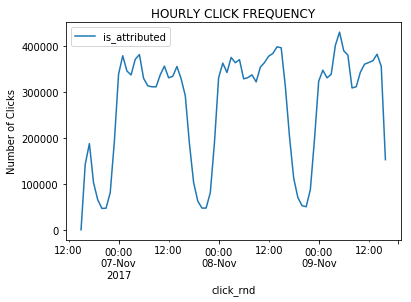

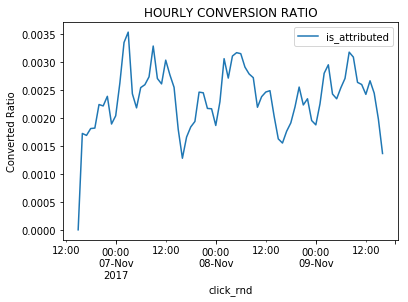

In [104]:
#round the time to nearest hour
train_smp['click_rnd']=train_smp['click_time'].dt.round('H')  

#check for hourly patterns
train_smp[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

train_smp[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

In [53]:
merge.head()

,channel,click_count,prop_downloaded
0,280,1628472,0.000292
1,245,959047,0.000093
2,107,914875,0.000537
3,477,776955,0.000169
4,134,639092,0.000554


In [62]:
import pickle